In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
%cd "/content/drive"
data=pd.read_csv('MyDrive/kaggle_cluster_covid/Cleaned-Data.csv')

/content/drive


In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [ ]:
data1=data.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe' ],axis=1) 
data1=data1.drop(['Country'],axis=1)
data1.head()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_df_scaled=scaler.fit_transform(data1)

## PCA

In [ ]:
pca = PCA(2)
pca

PCA(n_components=2)

In [ ]:
df = pca.fit_transform(train_df_scaled)
df = pd.DataFrame(df)
df.columns = ['P1', 'P2']
print(df.head())

         P1        P2
0 -2.109426 -1.831604
1 -2.109563 -1.831705
2 -2.109827 -1.832189
3 -2.109426 -1.831604
4 -2.109563 -1.831705


# Elbow

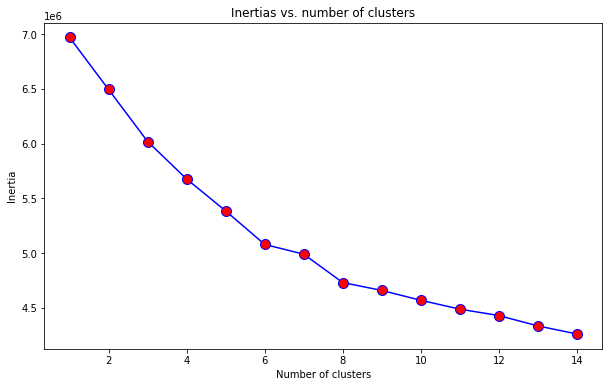

In [ ]:
inertias = []

for i in range(1,15):
    km=KMeans(n_clusters=i, random_state=2)
    km.fit(train_df_scaled)
    inertias.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,15), inertias, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertias versus number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
bouldin_score=[]

for i in range(4,15):
    km=KMeans(n_clusters=i, random_state=2)
    labels=km.fit_predict(train_df_scaled)
    bouldin_score.append(davies_bouldin_score(train_df_scaled, labels))

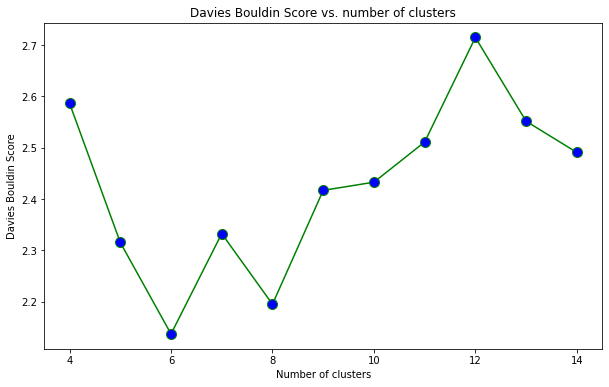

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(4,15), bouldin_score, color='green', marker='o', markerfacecolor='blue', markersize=10)
#Davies Bouldin Score 
plt.title('Davies Bouldin Score vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

#K-Means

In [ ]:
df = pd.DataFrame(train_df_scaled)
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 7)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[5 5 5 ... 0 0 0]


In [ ]:
label_df=pd.Dataframe(label)
label_df

316800

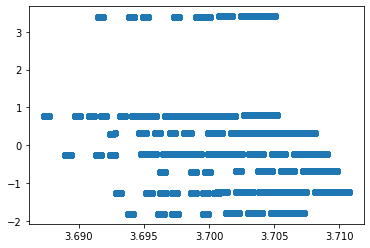

In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
#plotting the results
plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.show()

No handles with labels found to put in legend.


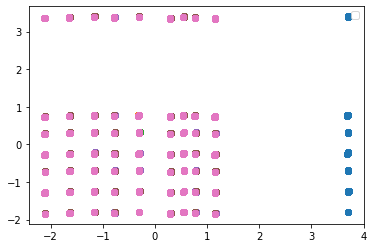

In [ ]:
u_labels = np.unique(label)
 
#plotting the results:
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
filtered_label6 = df[label == 6]


plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.scatter(filtered_label1['P1'] , filtered_label1['P2'])
plt.scatter(filtered_label2['P1'] , filtered_label2['P2'])
plt.scatter(filtered_label3['P1'] , filtered_label3['P2'])
plt.scatter(filtered_label4['P1'] , filtered_label4['P2'])
plt.scatter(filtered_label5['P1'] , filtered_label5['P2'])
plt.scatter(filtered_label6['P1'] , filtered_label6['P2'])


plt.legend()
plt.show()


No handles with labels found to put in legend.


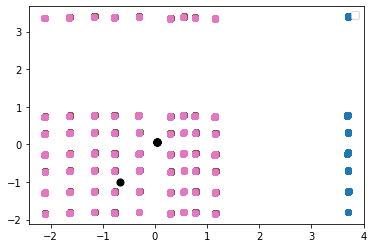

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:

filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
filtered_label5 = df[label == 5]
filtered_label6 = df[label == 6]


plt.scatter(filtered_label0['P1'] , filtered_label0['P2'])
plt.scatter(filtered_label1['P1'] , filtered_label1['P2'])
plt.scatter(filtered_label2['P1'] , filtered_label2['P2'])
plt.scatter(filtered_label3['P1'] , filtered_label3['P2'])
plt.scatter(filtered_label4['P1'] , filtered_label4['P2'])
plt.scatter(filtered_label5['P1'] , filtered_label5['P2'])
plt.scatter(filtered_label6['P1'] , filtered_label6['P2'])

plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend()
plt.show()

# Birch

In [ ]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pca_birch = PCA(1)
pca_birch

PCA(n_components=1)

In [ ]:
df_birch = pca_birch.fit_transform(train_df_scaled)
 
df_birch.shape

(316800, 1)

In [ ]:
df_birch_1=df_birch[:25000,:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


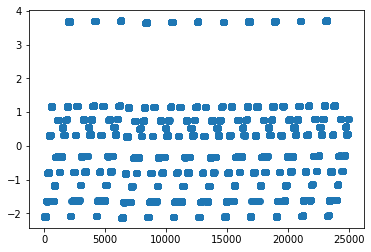

In [ ]:
x_range = range(len(df_birch_1))
x = np.array(list(zip(x_range, df_birch_1))).reshape(len(x_range), 2)

plt.scatter(x[:,0], x[:,1])
plt.show()

Birch(branching_factor=100)


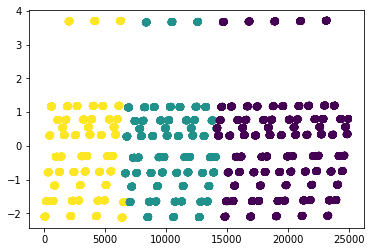

In [ ]:
bclust=Birch(branching_factor=100, threshold=.5).fit(x)
print(bclust)

labels = bclust.predict(x)

plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()